In [1]:
import pandas as pd
import numpy as np

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 여자

## 랜덤포레스트 (피쳐임포턴스)

### 피쳐임포턴스 연속형

In [2]:
### 1-1 "기본 제거 + 다중공선성 제거 → 피처임포턴스 확인 (0.01 이상 필터링 전)"

 [1-1] 연속형 변수 - 피처 임포턴스
DS1_BMI          0.10
DS1_MUSCLE       0.09
DS1_SBP          0.09
DS1_PBF          0.09
DS1_HIP          0.08
DS1_PULSE        0.08
DS1_DBP          0.08
DS1_AGE          0.07
DS1_WHR          0.07
DS1_VISFAT       0.06
total_exer       0.04
total_walk       0.04
DS1_INCOME_RE    0.02
DS1_EDU_RE       0.02
DS1_DRINK_RE     0.01
DS1_FDM          0.01
DS1_MARRY_RE     0.01
DS1_HTN          0.01
DS1_SMOKE_RE     0.01
dtype: float64


C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_5088\4112874721.py:50: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_5088\4112874721.py:50: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_5088\4112874721.py:50: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_5088\4112874721.py:50: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_5088\4112874721.py:50: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_5088\4112874721.py:50: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BY

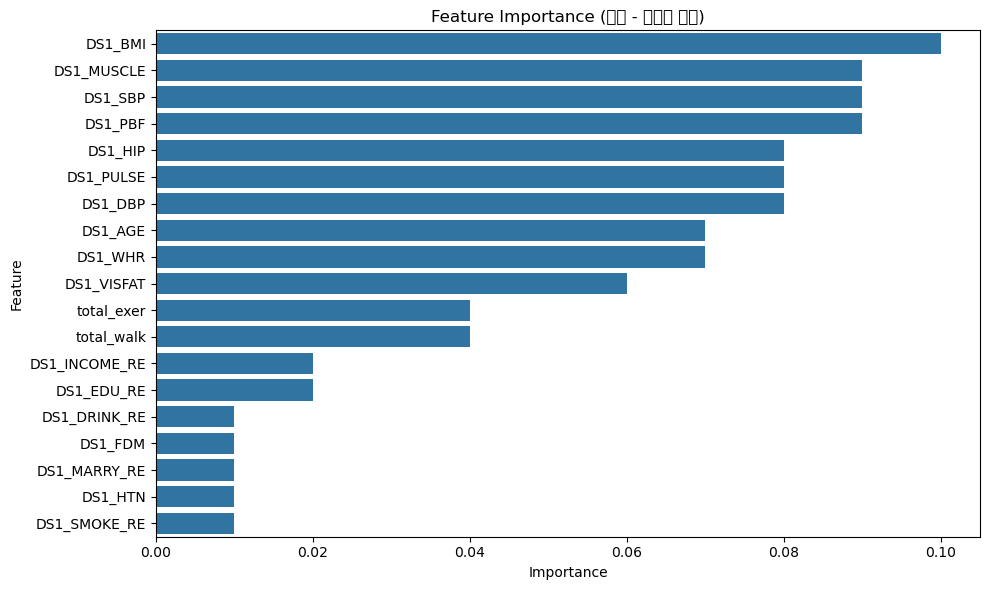

In [3]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")
continuous_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]


basic_drop = ['DS1_ID', 'DS1_SEX', 'DS1_GLU0', 'DS1_HBA1C', 'DS1_EXER', 'target']
vif_drop = ['DS1_BODTFAT', 'DS1_WAIST']
drop_list = basic_drop + vif_drop


y = female_final_df['target']
X = female_final_df[continuous_vars].drop(columns=[col for col in drop_list if col in continuous_vars])


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).round(2)


print(" [1-1] 연속형 변수 - 피처 임포턴스")
print(feature_importances)


plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (남자 - 연속형 변수)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [4]:
### 1-2 자 데이터 + 연속형 변수

In [5]:
from sklearn.metrics import classification_report

# 0.01 이상 중요 변수만 선택
important_vars = feature_importances[feature_importances >= 0.01].index.tolist()
X_filtered = X[important_vars]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X_filtered, y, test_size=0.4, random_state=42, stratify=y)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42, stratify=y_temp2)

rf_filtered = RandomForestClassifier(random_state=42)
rf_filtered.fit(X_train2, y_train2)


y_pred2 = rf_filtered.predict(X_test2)
print("[1-2] 피처임포턴스 ≥ 0.01 변수만 사용한 결과")
print(classification_report(y_test2, y_pred2))

[1-2] 피처임포턴스 ≥ 0.01 변수만 사용한 결과
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
### 1-3 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC ( 하이퍼파라미터 없음)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np


model = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(model, X_train2, y_train2, cv=5, scoring='roc_auc')
print(f"[1-3] 5-Fold Cross-Validation AUC 평균: {round(np.mean(cv_scores), 3)}")
model.fit(X_train2, y_train2)

y_val_proba = model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)

if valid_range.sum() == 0:
    best_threshold = 0.5
    print(" 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[1-3] 최적 임계값 (유든 기준): {round(best_threshold, 2)}")

# 테스트셋 평가
y_test_proba = model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[1-3] 테스트셋 평가 결과 (K-Fold + 유든 적용, 튜닝 없음)")
print(" AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test2, y_test_pred))

[1-3] 5-Fold Cross-Validation AUC 평균: 0.711
[1-3] 최적 임계값 (유든 기준): 0.43
[1-3] 테스트셋 평가 결과 (K-Fold + 유든 적용, 튜닝 없음)
 AUC: 0.723
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### 1-4 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC + 하이퍼파라터터

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]
X = female_final_df[categorical_vars]
y = female_final_df['target']


X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)


param_grid = {
    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced'] 

    # 'n_estimators': [100, 300],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']

    'n_estimators': [100],
     'max_depth': [3, 5, 7],
     'min_samples_split': [4, 6],
     'min_samples_leaf': [2, 4],
     'class_weight': ['balanced']
    
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_

# 검증셋 예측
y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr


valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[1-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]

print(f"[1-3] 최적 임계값 (0.4~0.7 제한): {round(best_threshold, 2)}")


val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[1-3] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[1-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)")
print(classification_report(y_test2, y_test_pred))
print("[1-3] 테스트셋 AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))

[1-3] 최적 임계값 (0.4~0.7 제한): 0.42
[1-3] 검증셋 AUC: 0.75
[1-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)
              precision    recall  f1-score   support

           0       0.99      0.58      0.73     13436
           1       0.04      0.76      0.08       333

    accuracy                           0.58     13769
   macro avg       0.52      0.67      0.40     13769
weighted avg       0.97      0.58      0.71     13769

[1-3] 테스트셋 AUC: 0.753


In [6]:
### 1-4 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC + 하이퍼파라터터
###### 약한 트리 + 직접 가중치(class_weight) 조절
######결과적으로 다른 점: 
# 1. 불균형 데이터에 대한 민감도를 더 높인다. 
# 2. 과적합을 줄이고 더 일반화된 결과를 얻을 수 있다. 
# 3. 특히, 양성(1번 클래스) 탐지가 중요한 문제에서 Recall을 높이고자 할 때 강력한 전략이 돼.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split


categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]

X = female_final_df[categorical_vars]
y = female_final_df['target']
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

# 간단한 튜닝용 param_grid (depth 작게 유지)
param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# class_weight 수동 조정 + 약한 트리 조합
base_model = RandomForestClassifier(
    max_depth=4,
    class_weight={0:1, 1:2},  # 직접 가중치 설정
    random_state=42
)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_


y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[추가 튜닝] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[추가 튜닝] 최적 임계값 (유든 기준): {round(best_threshold, 2)}")


val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[추가 튜닝] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[추가 튜닝] 테스트셋 평가 결과 (유든 인덱스 적용)")
print("AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test2, y_test_pred))

[추가 튜닝] 유효한 threshold 없음 → 기본값 0.5 사용
[추가 튜닝] 최적 임계값 (유든 기준): 0.5
[추가 튜닝] 검증셋 AUC: 0.749
[추가 튜닝] 테스트셋 평가 결과 (유든 인덱스 적용)
AUC: 0.755
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 피쳐임포턴스 범주형 변수

In [ ]:
### 2-1 여자 데이터 + 범주형 변수 + 기본 제거 + 다중공선성 제거 → 피처임포턴스 확인 (0.01 이상 필터링 전)

 [2-1] 범주형 변수 - 피처 임포턴스
DS1_MUSCLE       0.11
DS1_SBP          0.10
DS1_PBF          0.10
DS1_HIP          0.10
DS1_PULSE        0.09
DS1_DBP          0.09
DS1_AGE          0.08
DS1_WHR          0.08
DS1_VISFAT       0.07
DS1_INCOME_RE    0.03
exer_category    0.02
DS1_EDU_RE       0.02
walk_category    0.02
DS1_DRINK_RE     0.02
DS1_FDM          0.02
DS1_MARRY_RE     0.01
BMI_category     0.01
DS1_HTN          0.01
DS1_SMOKE_RE     0.01
dtype: float64


C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_6716\1141089440.py:53: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_6716\1141089440.py:53: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_6716\1141089440.py:53: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_6716\1141089440.py:53: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_6716\1141089440.py:53: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\JEONGHEE\AppData\Local\Temp\ipykernel_6716\1141089440.py:53: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYE

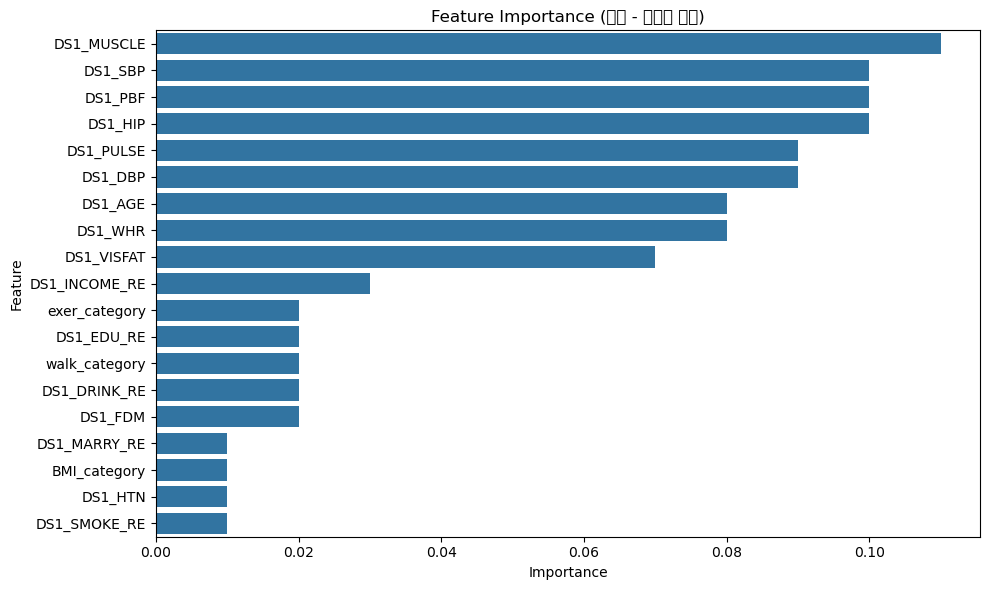

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")
 
categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

basic_drop = ['DS1_ID', 'DS1_SEX', 'DS1_GLU0', 'DS1_HBA1C', 'DS1_EXER', 'target']
vif_drop = ['DS1_BODTFAT', 'DS1_WAIST']
drop_list = basic_drop + vif_drop

y = female_final_df['target']

X = female_final_df[categorical_vars].drop(columns=[col for col in drop_list if col in categorical_vars])

X = X.fillna(0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).round(2)

print(" [2-1] 범주형 변수 - 피처 임포턴스")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (남자 - 범주형 변수)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
### 2-2 여자 데이터 + 범주형 변수 + 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과 + AUC 포함"

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

important_vars = feature_importances[feature_importances >= 0.01].index.tolist()
X_filtered = X[important_vars]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X_filtered, y, test_size=0.4, random_state=42, stratify=y)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42, stratify=y_temp2)

rf_filtered = RandomForestClassifier(random_state=42)
rf_filtered.fit(X_train2, y_train2)

y_pred2 = rf_filtered.predict(X_test2)
y_proba2 = rf_filtered.predict_proba(X_test2)[:, 1]

print(" [2-2] 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과")
print(classification_report(y_test2, y_pred2))
print(" AUC score:", round(roc_auc_score(y_test2, y_proba2), 3))

 [2-2] 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769

 AUC score: 0.715


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### 2-3 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC ( 하이퍼파라미터 없음)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = female_final_df[categorical_vars]
y = female_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train2, y_train2, cv=5, scoring='roc_auc')
print(f"[2-3] 5-Fold AUC 평균: {round(np.mean(cv_scores), 3)}")

model.fit(X_train2, y_train2)

y_val_proba = model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)

if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[2-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[2-3] 최적 임계값 (유든 인덱스): {round(best_threshold, 2)}")

y_test_proba = model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[2-3] 테스트셋 평가 (튜닝 없음 + K-Fold + 유든 적용)")
print(" AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test2, y_test_pred))

[2-3] 5-Fold AUC 평균: 0.72
[2-3] 최적 임계값 (유든 인덱스): 0.41
[2-3] 테스트셋 평가 (튜닝 없음 + K-Fold + 유든 적용)
 AUC: 0.723
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### 2-4 여자 데이터 + 범주형 변수 + 유든 인덱스 기반 최적 임계값 설정 + 하이퍼파라미터 튜닝 + AUC 출력

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = female_final_df[categorical_vars]
y = female_final_df['target']
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced'] 

    # 'n_estimators': [100],
    # 'max_depth': [3, 5, 7],
    # 'min_samples_split': [4, 6],
    # 'min_samples_leaf': [2, 4],
    # 'class_weight': ['balanced']

    # 'n_estimators': [100, 150],
    #  'max_depth': [5, 10, None],
    #  'min_samples_split': [2, 5],
    #  'min_samples_leaf': [1, 2],
    #  'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr


valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[2-4] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]

print(f"[2-4] 최적 임계값 (0.4~0.7 제한): {round(best_threshold, 2)}")


val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[2-4] 검증셋 AUC: {round(val_auc, 3)}")


y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[2-4] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)")
print(classification_report(y_test2, y_test_pred))
print("[2-4] 테스트셋 AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))

[2-4] 최적 임계값 (0.4~0.7 제한): 0.42
[2-4] 검증셋 AUC: 0.752
[2-4] 테스트셋 결과 (유든 인덱스 기반 threshold 적용)
              precision    recall  f1-score   support

           0       0.99      0.56      0.72     13436
           1       0.04      0.79      0.08       333

    accuracy                           0.57     13769
   macro avg       0.52      0.68      0.40     13769
weighted avg       0.97      0.57      0.70     13769

[2-4] 테스트셋 AUC: 0.752


In [ ]:
### 2-4 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC + 하이퍼파라터터
###### 약한 트리 + 직접 가중치(class_weight) 조절
######결과적으로 다른 점: 
# 1. 불균형 데이터에 대한 민감도를 더 높인다. 
# 2. 과적합을 줄이고 더 일반화된 결과를 얻을 수 있다. 
# 3. 특히, 양성(1번 클래스) 탐지가 중요한 문제에서 Recall을 높이고자 할 때 강력한 전략이 돼.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np


categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = female_final_df[categorical_vars]
y = female_final_df['target']


X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)


param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# class_weight 수동 조정 + 약한 트리 조합
base_model = RandomForestClassifier(
    max_depth=4,
    class_weight={0:1, 1:2},  # 직접 가중치 설정
    random_state=42
)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_


y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr


valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[추가 튜닝] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[추가 튜닝] 최적 임계값 (유든 기준): {round(best_threshold, 2)}")

# 검증 AUC
val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[추가 튜닝] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[추가 튜닝] 테스트셋 평가 결과 (유든 인덱스 적용)")
print("AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test2, y_test_pred))

[추가 튜닝] 유효한 threshold 없음 → 기본값 0.5 사용
[추가 튜닝] 최적 임계값 (유든 기준): 0.5
[추가 튜닝] 검증셋 AUC: 0.75
[추가 튜닝] 테스트셋 평가 결과 (유든 인덱스 적용)
AUC: 0.753
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 랜덤포레스트 (rfe 10개와 15개)

### 연속형 rfe 10개 / 15개

In [ ]:
### 3-1. 연속형 변수 – 다중공선성 + 기본제거 변수 제거 후 RFE (10개 / 15개) 출력

In [1]:
import pandas as pd
import numpy as np

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")


continuous_vars_filtered = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP',
    'DS1_DBP', 'DS1_PBF', 'DS1_BMI', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR',
    'total_exer', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE',
    'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'total_walk'
]

X = female_final_df[continuous_vars_filtered]
y = female_final_df['target']

def rfe_results(X, y, n_features):
    model = RandomForestClassifier(random_state=42)
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector.fit(X, y)

    result_df = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    }).sort_values('Ranking').reset_index(drop=True)

    selected = result_df[result_df['Selected'] == True]['Feature'].tolist()
    removed = result_df[result_df['Selected'] == False]['Feature'].tolist()

    return result_df, selected, removed

# 10개 RFE
rfe10_df, rfe_10_selected, rfe_10_removed = rfe_results(X, y, 10)
print("[3-1] RFE 10개 선택된 변수:")
print(rfe_10_selected)
print("\n[3-1] RFE 10개 제거된 변수:")
print(rfe_10_removed)

# 15개 RFE
rfe15_df, rfe_15_selected, rfe_15_removed = rfe_results(X, y, 15)
print("\n[3-1] RFE 15개 선택된 변수:")
print(rfe_15_selected)
print("\n[3-1] RFE 15개 제거된 변수:")
print(rfe_15_removed)

[3-1] RFE 10개 선택된 변수:
['DS1_AGE', 'DS1_WHR', 'DS1_VISFAT', 'DS1_BMI', 'DS1_PBF', 'DS1_DBP', 'DS1_MUSCLE', 'DS1_PULSE', 'DS1_HIP', 'DS1_SBP']

[3-1] RFE 10개 제거된 변수:
['total_exer', 'total_walk', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_DRINK_RE', 'DS1_MARRY_RE', 'DS1_FDM', 'DS1_HTN', 'DS1_SMOKE_RE']

[3-1] RFE 15개 선택된 변수:
['DS1_AGE', 'DS1_EDU_RE', 'DS1_INCOME_RE', 'total_exer', 'DS1_WHR', 'DS1_VISFAT', 'DS1_DRINK_RE', 'DS1_BMI', 'DS1_MUSCLE', 'DS1_DBP', 'DS1_SBP', 'DS1_PULSE', 'DS1_HIP', 'DS1_PBF', 'total_walk']

[3-1] RFE 15개 제거된 변수:
['DS1_MARRY_RE', 'DS1_FDM', 'DS1_HTN', 'DS1_SMOKE_RE']


### 연속형 rfe 10개 

In [ ]:
### [3-2] RFE 10개 연속형 변수로 랜덤포레스트 학습 (기본 설정, 하이퍼파라미터 & CV 없이)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_rfe10 = female_final_df[rfe_10_selected]
y = female_final_df['target']


X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 기본 RandomForestClassifier로 학습 (하이퍼파라미터 튜닝 없음)
model_basic = RandomForestClassifier(random_state=42)
model_basic.fit(X_train, y_train)


y_test_proba = model_basic.predict_proba(X_test)[:, 1]
y_test_pred = model_basic.predict(X_test)

print("[3-2]  기본 RandomForestClassifier 결과 (RFE 10개 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-2]  기본 RandomForestClassifier 결과 (RFE 10개 변수)
 AUC: 0.695
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### [3-3] RFE 10개 유든 인덱스 기반 threshold 설정 + 하이퍼파라미터 튜닝 + 테스트셋 평가

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np


X_rfe10 = female_final_df[rfe_10_selected]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 하이퍼파라미터 튜닝 (class_weight 반드시 포함)
param_grid = {
    # 'n_estimators': [100, 300],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']

    # 'n_estimators': [100, 150],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']

    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']


    'n_estimators': [100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced']

    
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[3-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[3-3] 최적 임계값 (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-3] 테스트셋 평가 결과 (유든 인덱스 기반 threshold 적용)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-3] 최적 임계값 (Youden 기준): 0.45
[3-3] 테스트셋 평가 결과 (유든 인덱스 기반 threshold 적용)
 AUC: 0.747
 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     13436
           1       0.05      0.74      0.09       333

    accuracy                           0.62     13769
   macro avg       0.52      0.68      0.42     13769
weighted avg       0.97      0.62      0.74     13769



In [27]:
### [3-3.1] RFE 10개 유든 인덱스 기반 threshold 설정 + 테스트셋 평가

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_rfe10 = female_final_df[rfe_10_selected]
y = female_final_df['target']


X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"[3-3.1] 5-Fold Cross-Validation AUC 평균: {round(np.mean(cv_scores), 3)}")


model.fit(X_train, y_train)

y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[3-3.1] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[3-3★] 최적 임계값 (유든 기준): {round(best_threshold, 2)}")

y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-3.1] 테스트셋 평가 결과 (튜닝 없음 + 유든 적용)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-3.1] 5-Fold Cross-Validation AUC 평균: 0.704
[3-3★] 최적 임계값 (유든 기준): 0.46
[3-3.1] 테스트셋 평가 결과 (튜닝 없음 + 유든 적용)
AUC: 0.695
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 연속형 rfe 15개

In [ ]:
### [3-4] RFE 15개 연속형 변수로 기본 RandomForest 학습 + 테스트셋 평가 (하이퍼파라미터 X)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_rfe15 = female_final_df[rfe_15_selected]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_15 = RandomForestClassifier(random_state=42)
model_basic_15.fit(X_train, y_train)

y_test_proba = model_basic_15.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_15.predict(X_test)

print("[3-4] 기본 RandomForest (RFE 15개 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-4] 기본 RandomForest (RFE 15개 변수)
 AUC: 0.719
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#### [3-5] RFE 15개 + 하이퍼파라미터 튜닝 + 기본 threshold 평가 + cv=5

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import numpy as np

X = female_final_df[rfe_15_selected]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

param_grid = {
    # 'n_estimators': [100, 300],
    # 'max_depth': [3, 8],
    # 'min_samples_split': [2],
    # 'min_samples_leaf': [1],
    # 'class_weight': ['balanced']

    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']

    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [4],
    'min_samples_leaf': [2],
    'class_weight': ['balanced_subsample']

    # 'n_estimators': [100, 150],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']


    # 'n_estimators': [100],
    # 'max_depth': [4, 6],
    # 'min_samples_split': [2],
    # 'min_samples_leaf': [1],
    # 'class_weight': ['blanced']

}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-6] 연속형 RFE 15개 | 최종 종합 평가 모델")
print(" 최적 threshold (유든 인덱스):", round(best_threshold, 2))
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-6] 연속형 RFE 15개 | 최종 종합 평가 모델
 최적 threshold (유든 인덱스): 0.5
AUC: 0.749
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     13436
           1       0.05      0.67      0.09       333

    accuracy                           0.69     13769
   macro avg       0.52      0.68      0.45     13769
weighted avg       0.97      0.69      0.79     13769



### 범주형 rfe 10개 / 15개

In [ ]:
### [4-1] 범주형 변수 – 다중공선성 + 기본제거 반영 → RFE (10개 & 15개) 결과 출력

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd


female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

categorical_vars_filtered = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = female_final_df[categorical_vars_filtered]
y = female_final_df['target']

def rfe_results(X, y, n_features):
    model = RandomForestClassifier(random_state=42)
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector.fit(X, y)
    result_df = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    }).sort_values('Ranking').reset_index(drop=True)

    selected = result_df[result_df['Selected']]['Feature'].tolist()
    removed = result_df[~result_df['Selected']]['Feature'].tolist()
    return result_df, selected, removed

rfe10_df, rfe_10_selected_cat, rfe_10_removed_cat = rfe_results(X, y, 10)
print("[4-1] RFE 10개 선택된 범주형 변수:")
print(rfe_10_selected_cat)
print("\n[4-1] RFE 10개 제거된 변수:")
print(rfe_10_removed_cat)

rfe15_df, rfe_15_selected_cat, rfe_15_removed_cat = rfe_results(X, y, 15)
print("\n[4-1] RFE 15개 선택된 범주형 변수:")
print(rfe_15_selected_cat)
print("\n[4-1] RFE 15개 제거된 변수:")
print(rfe_15_removed_cat)

[4-1] RFE 10개 선택된 범주형 변수:
['DS1_AGE', 'DS1_INCOME_RE', 'DS1_WHR', 'DS1_MUSCLE', 'DS1_PBF', 'DS1_DBP', 'DS1_VISFAT', 'DS1_PULSE', 'DS1_HIP', 'DS1_SBP']

[4-1] RFE 10개 제거된 변수:
['exer_category', 'DS1_EDU_RE', 'walk_category', 'DS1_DRINK_RE', 'BMI_category', 'DS1_MARRY_RE', 'DS1_FDM', 'DS1_HTN', 'DS1_SMOKE_RE']

[4-1] RFE 15개 선택된 범주형 변수:
['DS1_AGE', 'DS1_DRINK_RE', 'DS1_EDU_RE', 'DS1_INCOME_RE', 'exer_category', 'DS1_WHR', 'BMI_category', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_DBP', 'DS1_SBP', 'DS1_PULSE', 'DS1_HIP', 'DS1_PBF', 'walk_category']

[4-1] RFE 15개 제거된 변수:
['DS1_MARRY_RE', 'DS1_FDM', 'DS1_HTN', 'DS1_SMOKE_RE']


### 범주형 rfe 10개

In [ ]:
###  [4-2] RFE 10개 범주형 변수 기반 RandomForest (기본 설정, 하이퍼파라미터 없음)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_cat10 = female_final_df[rfe_10_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_cat10 = RandomForestClassifier(random_state=42)
model_basic_cat10.fit(X_train, y_train)

y_test_proba = model_basic_cat10.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_cat10.predict(X_test)

print("[4-2] RFE 10개 범주형 변수 기반 기본 모델 평가")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-2] RFE 10개 범주형 변수 기반 기본 모델 평가
 AUC: 0.69
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
### [4-3] 범주형 RFE 10개 변수 기준 + 하이퍼파라미터 튜닝 (class_weight 포함) + 유든 인덱스 기반 threshold 적용 + 최종 테스트셋 평가 (AUC + classification_report)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_cat10 = female_final_df[rfe_10_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

param_grid = {
    # 'n_estimators': [100, 300],
    # 'max_depth': [3, 8],
    # 'min_samples_split': [2],
    # 'min_samples_leaf': [1],
    # 'class_weight': ['balanced']

    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']

    # 'n_estimators': [50, 100],
    # 'max_depth': [3, 5],
    # 'min_samples_split': [4],
    # 'min_samples_leaf': [2],
    # 'class_weight': ['balanced_subsample']

    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']


    # 'n_estimators': [100],
    # 'max_depth': [4, 6],
    # 'min_samples_split': [2],
    # 'min_samples_leaf': [1],
    # 'class_weight': ['balanced']
    
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-3] 최적 threshold (Youden Index 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-3] 최종 테스트셋 평가 결과 (RFE 10개 범주형 + 튜닝 + 유든)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-3] 최적 threshold (Youden Index 기준): 0.44
[4-3] 최종 테스트셋 평가 결과 (RFE 10개 범주형 + 튜닝 + 유든)
AUC: 0.744
 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     13436
           1       0.04      0.75      0.08       333

    accuracy                           0.60     13769
   macro avg       0.52      0.67      0.41     13769
weighted avg       0.97      0.60      0.73     13769



### 범주형 rfe 15개 

In [ ]:
### 4-4 RFE 15개 범주형 변수 기반 RandomForest (하이퍼파라미터 튜닝 없이)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_cat15 = female_final_df[rfe_15_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_cat15 = RandomForestClassifier(random_state=42)
model_basic_cat15.fit(X_train, y_train)

y_test_proba = model_basic_cat15.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_cat15.predict(X_test)

print("[4-4] 기본 모델 평가 (RFE 15개 범주형 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

In [ ]:
### [4-5] RFE 15개 범주형 변수 + 하이퍼파라미터 튜닝 + 유든 인덱스 기반 평가

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_cat15 = female_final_df[rfe_15_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

param_grid = {
    # 'n_estimators': [100, 300],
    # 'max_depth': [3, 8],
    # 'min_samples_split': [2],
    # 'min_samples_leaf': [1],
    # 'class_weight': ['balanced']

    # 'n_estimators': [100, 200],
    # 'max_depth': [5, 10, None],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2],
    # 'class_weight': ['balanced']

    # 'n_estimators': [50, 100],
    # 'max_depth': [3, 5],
    # 'min_samples_split': [4],
    # 'min_samples_leaf': [2],
    # 'class_weight': ['balanced_subsample']

    'n_estimators': [100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']


    # 'n_estimators': [100],
    # 'max_depth': [4, 6],
    # 'min_samples_split': [2],
    # 'min_samples_leaf': [1],
    # 'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-5] 최적 threshold (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-5] 최종 테스트셋 평가 결과 (범주형 RFE 15개 + 튜닝 + 유든)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-5] 최적 threshold (Youden 기준): 0.45
[4-5] 최종 테스트셋 평가 결과 (범주형 RFE 15개 + 튜닝 + 유든)
AUC: 0.748
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     13436
           1       0.05      0.74      0.09       333

    accuracy                           0.62     13769
   macro avg       0.52      0.68      0.42     13769
weighted avg       0.97      0.62      0.74     13769



In [ ]:
### [4-6] K-Fold 유지 + 하이퍼파라미터 튜닝 제거

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_cat15 = female_final_df[rfe_15_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-6] 최적 threshold (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-6] 테스트셋 평가 (K-Fold 유지 / 튜닝 없음 / 유든 적용)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

## xgboost (피쳐임포턴스)

### 피쳐임포턴스 연속형

In [1]:
import pandas as pd
import numpy as np

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

In [2]:
### 1-1 "기본 제거 + 다중공선성 제거 → 피처임포턴스 확인 (0.01 이상 필터링 전)"

 [1-2] 연속형 변수 - XGBoost 피처 임포턴스
DS1_FDM          0.09
DS1_WHR          0.08
DS1_HTN          0.08
DS1_BMI          0.07
DS1_EDU_RE       0.05
DS1_VISFAT       0.05
DS1_SBP          0.05
DS1_AGE          0.05
DS1_PULSE        0.05
DS1_PBF          0.05
DS1_SMOKE_RE     0.05
DS1_HIP          0.05
DS1_DBP          0.04
DS1_MUSCLE       0.04
total_walk       0.04
DS1_MARRY_RE     0.04
total_exer       0.04
DS1_DRINK_RE     0.04
DS1_INCOME_RE    0.04
dtype: float32


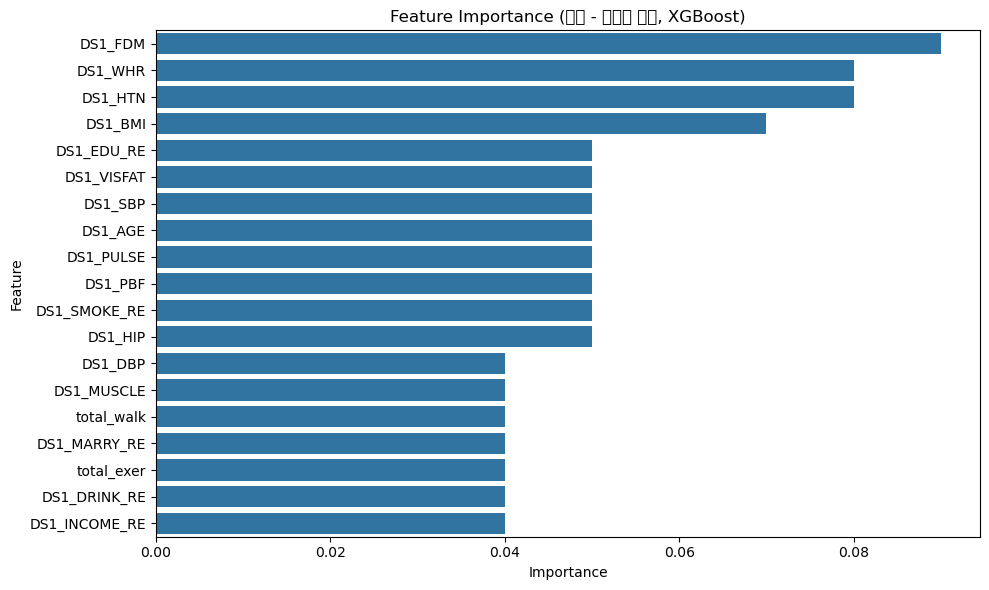

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

continuous_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]

basic_drop = ['DS1_ID', 'DS1_SEX', 'DS1_GLU0', 'DS1_HBA1C', 'DS1_EXER', 'target']
vif_drop = ['DS1_BODTFAT', 'DS1_WAIST']
drop_list = basic_drop + vif_drop

y = female_final_df['target']

X = female_final_df[continuous_vars].drop(columns=[col for col in drop_list if col in continuous_vars])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

feature_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False).round(2)

print(" [1-2] 연속형 변수 - XGBoost 피처 임포턴스")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (여자 - 연속형 변수, XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [6]:
### 1-2 여자 데이터 + 연속형 변수

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

important_vars = feature_importances[feature_importances >= 0.01].index.tolist()
X_filtered = X[important_vars]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X_filtered, y, test_size=0.4, random_state=42, stratify=y)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42, stratify=y_temp2)

xgb_filtered = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_filtered.fit(X_train2, y_train2)

y_pred2 = xgb_filtered.predict(X_test2)
print("[1-2] XGBoost - 피처임포턴스 ≥ 0.01 변수만 사용한 결과")
print(classification_report(y_test2, y_pred2))

[1-2] XGBoost - 피처임포턴스 ≥ 0.01 변수만 사용한 결과
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.18      0.01      0.01       333

    accuracy                           0.98     13769
   macro avg       0.58      0.50      0.50     13769
weighted avg       0.96      0.98      0.96     13769



In [8]:
### 1-3 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC ( 하이퍼파라미터 없음)

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv_scores = cross_val_score(model, X_train2, y_train2, cv=5, scoring='roc_auc')
print(f"[1-3] 5-Fold Cross-Validation AUC 평균: {round(np.mean(cv_scores), 3)}")

model.fit(X_train2, y_train2)

y_val_proba = model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)

if valid_range.sum() == 0:
    best_threshold = 0.5
    print(" 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[1-3] 최적 임계값 (유든 기준): {round(best_threshold, 2)}")

y_test_proba = model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[1-3] 테스트셋 평가 결과 (K-Fold + 유든 적용, 튜닝 없음, XGBoost)")
print(" AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test2, y_test_pred))

[1-3] 5-Fold Cross-Validation AUC 평균: 0.717
 유효한 threshold 없음 → 기본값 0.5 사용
[1-3] 최적 임계값 (유든 기준): 0.5
[1-3] 테스트셋 평가 결과 (K-Fold + 유든 적용, 튜닝 없음, XGBoost)
 AUC: 0.705
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.18      0.01      0.01       333

    accuracy                           0.98     13769
   macro avg       0.58      0.50      0.50     13769
weighted avg       0.96      0.98      0.96     13769



In [10]:
### 1-4 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC + 하이퍼파라터터

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]
X = female_final_df[categorical_vars]
y = female_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

scale_pos_weight = len(y_train2[y_train2 == 0]) / len(y_train2[y_train2 == 1])

param_grid = {
    # 'n_estimators': [100],
    # 'max_depth': [3, 5, 7],
    # 'min_child_weight': [2, 4], 
    # 'scale_pos_weight': [scale_pos_weight] 

    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [scale_pos_weight]


}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train2, y_train2)

y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[1-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[1-3] 최적 임계값 (0.4~0.7 제한): {round(best_threshold, 2)}")

val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[1-3] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[1-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용, XGBoost)")
print(classification_report(y_test2, y_test_pred))
print("[1-3] 테스트셋 AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[1-3] 최적 임계값 (0.4~0.7 제한): 0.4699999988079071
[1-3] 검증셋 AUC: 0.747
[1-3] 테스트셋 결과 (유든 인덱스 기반 threshold 적용, XGBoost)
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     13436
           1       0.05      0.63      0.10       333

    accuracy                           0.71     13769
   macro avg       0.52      0.67      0.46     13769
weighted avg       0.96      0.71      0.81     13769

[1-3] 테스트셋 AUC: 0.739


In [ ]:
### 1-4 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC + 하이퍼파라터터
###### 약한 트리 + 직접 가중치(class_weight) 조절
######결과적으로 다른 점: 
# 1. 불균형 데이터에 대한 민감도를 더 높인다. 
# 2. 과적합을 줄이고 더 일반화된 결과를 얻을 수 있다. 
# 3. 특히, 양성(1번 클래스) 탐지가 중요한 문제에서 Recall을 높이고자 할 때 강력한 전략이 돼.

In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP', 
    'DS1_PBF', 'DS1_BMI','DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'total_exer', 
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 
    'DS1_DRINK_RE', 'total_walk'
]

X = female_final_df[categorical_vars]
y = female_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

scale_pos_weight = 5
param_grid = {
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3]
}

base_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    max_depth=2,
    scale_pos_weight=scale_pos_weight
)
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[XGBoost 튜닝] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[XGBoost 튜닝] 최적 임계값 (유든 기준): {round(best_threshold, 2)}")

val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[XGBoost 튜닝] 검증셋 AUC: {round(val_auc, 3)}")

y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[XGBoost 튜닝] 테스트셋 평가 결과 (유든 인덱스 적용)")
print("AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test2, y_test_pred))


[XGBoost 튜닝] 최적 임계값 (유든 기준): 0.41999998688697815
[XGBoost 튜닝] 검증셋 AUC: 0.762
[XGBoost 튜닝] 테스트셋 평가 결과 (유든 인덱스 적용)
AUC: 0.758
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13436
           1       0.14      0.08      0.10       333

    accuracy                           0.97     13769
   macro avg       0.56      0.53      0.54     13769
weighted avg       0.96      0.97      0.96     13769



### 피쳐임포턴스 범주형

 [2-1] 범주형 변수 - 피처 임포턴스
DS1_MUSCLE       0.11
DS1_SBP          0.10
DS1_PBF          0.10
DS1_HIP          0.10
DS1_PULSE        0.09
DS1_DBP          0.09
DS1_AGE          0.08
DS1_WHR          0.08
DS1_VISFAT       0.07
DS1_INCOME_RE    0.03
exer_category    0.02
DS1_EDU_RE       0.02
walk_category    0.02
DS1_DRINK_RE     0.02
DS1_FDM          0.02
DS1_MARRY_RE     0.01
BMI_category     0.01
DS1_HTN          0.01
DS1_SMOKE_RE     0.01
dtype: float64


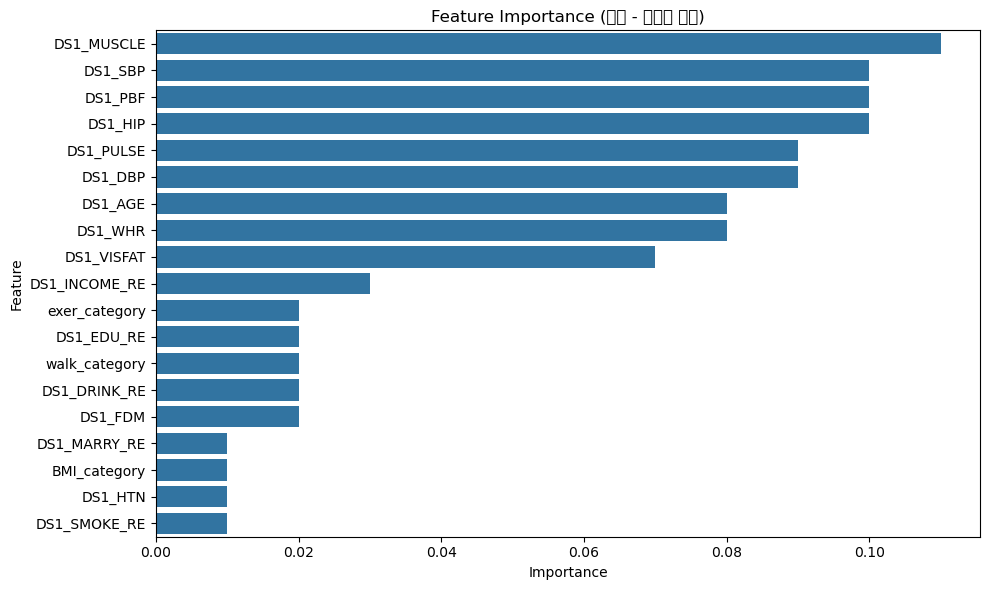

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

# 범주형 변수 리스트 
categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP','DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

basic_drop = ['DS1_ID', 'DS1_SEX', 'DS1_GLU0', 'DS1_HBA1C', 'DS1_EXER', 'target']
vif_drop = ['DS1_BODTFAT', 'DS1_WAIST']
drop_list = basic_drop + vif_drop

y = female_final_df['target']
X = female_final_df[categorical_vars].drop(columns=[col for col in drop_list if col in categorical_vars])

X = X.fillna(0)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).round(2)

print(" [2-1] 범주형 변수 - 피처 임포턴스")
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (남자 - 범주형 변수)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [8]:
### 2-2 여자 데이터 + 범주형 변수 + 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과 + AUC 포함"

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

important_vars = feature_importances[feature_importances >= 0.01].index.tolist()
X_filtered = X[important_vars]

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X_filtered, y, test_size=0.4, random_state=42, stratify=y)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42, stratify=y_temp2)

xgb_filtered = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_filtered.fit(X_train2, y_train2)

y_pred2 = xgb_filtered.predict(X_test2)
y_proba2 = xgb_filtered.predict_proba(X_test2)[:, 1]

print(" [2-2] 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과 (XGBoost)")
print(classification_report(y_test2, y_pred2))
print(" AUC score:", round(roc_auc_score(y_test2, y_proba2), 3))

 [2-2] 피처임포턴스 ≥ 0.01 변수만 사용한 테스트셋 결과 (XGBoost)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.20      0.01      0.01       333

    accuracy                           0.98     13769
   macro avg       0.59      0.50      0.50     13769
weighted avg       0.96      0.98      0.96     13769

 AUC score: 0.717


In [10]:
### 2-3 여자 데이터 + 연속형 변수 + 유든 인덱스 기반 최적 임계값 설정 + kfold + AUC ( 하이퍼파라미터 없음)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = female_final_df[categorical_vars]
y = female_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train2, y_train2, cv=5, scoring='roc_auc')
print(f"[2-3] 5-Fold AUC 평균: {round(np.mean(cv_scores), 3)}")
model.fit(X_train2, y_train2)

y_val_proba = model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)

if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[2-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[2-3] 최적 임계값 (유든 인덱스): {round(best_threshold, 2)}")

y_test_proba = model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[2-3] 테스트셋 평가 (튜닝 없음 + K-Fold + 유든 적용)")
print(" AUC:", round(roc_auc_score(y_test2, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test2, y_test_pred))

[2-3] 5-Fold AUC 평균: 0.72
[2-3] 최적 임계값 (유든 인덱스): 0.41
[2-3] 테스트셋 평가 (튜닝 없음 + K-Fold + 유든 적용)
 AUC: 0.723
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.00      0.00      0.00       333

    accuracy                           0.98     13769
   macro avg       0.49      0.50      0.49     13769
weighted avg       0.95      0.98      0.96     13769



In [12]:
### 2-4 여자 데이터 + 범주형 변수 + 유든 인덱스 기반 최적 임계값 설정 + 하이퍼파라미터 튜닝 + AUC 출력

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

categorical_vars = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = female_final_df[categorical_vars]
y = female_final_df['target']

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, stratify=y_temp2, random_state=42)

scale_pos_weight = len(y_train2[y_train2 == 0]) / len(y_train2[y_train2 == 1])

param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'scale_pos_weight': [scale_pos_weight]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train2, y_train2)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val2, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[2-4] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[2-4] 최적 임계값 (0.4~0.7 제한): {round(best_threshold, 2)}")


val_auc = roc_auc_score(y_val2, y_val_proba)
print(f"[2-4] 검증셋 AUC: {round(val_auc, 3)}")

# 테스트셋 평가
y_test_proba = best_model.predict_proba(X_test2)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[2-4] 테스트셋 결과 (XGBoost + 유든 인덱스 기반 threshold 적용)")
print(classification_report(y_test2, y_test_pred))
print("[2-4] 테스트셋 AUC:", round(roc_auc_score(y_test2, y_test_proba), 2))

[2-4] 최적 임계값 (0.4~0.7 제한): 0.4099999964237213
[2-4] 검증셋 AUC: 0.753
[2-4] 테스트셋 결과 (XGBoost + 유든 인덱스 기반 threshold 적용)
              precision    recall  f1-score   support

           0       0.99      0.64      0.78     13436
           1       0.05      0.69      0.09       333

    accuracy                           0.65     13769
   macro avg       0.52      0.67      0.43     13769
weighted avg       0.97      0.65      0.76     13769

[2-4] 테스트셋 AUC: 0.74


## xgboost (rfe 10개와 15개)

### 연속형 rfe 10개/15개

In [ ]:
### 3-1. 연속형 변수 – 다중공선성 + 기본제거 변수 제거 후 RFE (10개 / 15개) 출력

In [19]:
import pandas as pd
import numpy as np

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

In [20]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")

continuous_vars_filtered = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP',
    'DS1_DBP', 'DS1_PBF', 'DS1_BMI', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR',
    'total_exer', 'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE',
    'DS1_SMOKE_RE', 'DS1_DRINK_RE', 'total_walk'
]

X = female_final_df[continuous_vars_filtered]
y = female_final_df['target']

def rfe_results(X, y, n_features):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector.fit(X, y)

    result_df = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    }).sort_values('Ranking').reset_index(drop=True)

    selected = result_df[result_df['Selected'] == True]['Feature'].tolist()
    removed = result_df[result_df['Selected'] == False]['Feature'].tolist()

    return result_df, selected, removed


rfe10_df, rfe_10_selected, rfe_10_removed = rfe_results(X, y, 10)
print("[3-1] RFE 10개 선택된 변수 (XGBoost):")
print(rfe_10_selected)
print("\n[3-1] RFE 10개 제거된 변수 (XGBoost):")
print(rfe_10_removed)

rfe15_df, rfe_15_selected, rfe_15_removed = rfe_results(X, y, 15)
print("\n[3-1] RFE 15개 선택된 변수 (XGBoost):")
print(rfe_15_selected)
print("\n[3-1] RFE 15개 제거된 변수 (XGBoost):")
print(rfe_15_removed)


[3-1] RFE 10개 선택된 변수 (XGBoost):
['DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_SMOKE_RE', 'DS1_PULSE', 'DS1_SBP', 'DS1_EDU_RE', 'DS1_PBF', 'DS1_BMI', 'DS1_WHR']

[3-1] RFE 10개 제거된 변수 (XGBoost):
['DS1_MUSCLE', 'DS1_INCOME_RE', 'DS1_VISFAT', 'DS1_HIP', 'DS1_DRINK_RE', 'total_walk', 'DS1_DBP', 'total_exer', 'DS1_MARRY_RE']

[3-1] RFE 15개 선택된 변수 (XGBoost):
['DS1_AGE', 'DS1_SMOKE_RE', 'DS1_EDU_RE', 'DS1_INCOME_RE', 'DS1_WHR', 'DS1_VISFAT', 'DS1_DRINK_RE', 'DS1_BMI', 'DS1_MUSCLE', 'DS1_SBP', 'DS1_PULSE', 'DS1_HIP', 'DS1_FDM', 'DS1_HTN', 'DS1_PBF']

[3-1] RFE 15개 제거된 변수 (XGBoost):
['total_walk', 'DS1_DBP', 'total_exer', 'DS1_MARRY_RE']


### 연속형 rfe 10개

In [21]:
### [3-2] RFE 10개 연속형 변수로 랜덤포레스트 학습 (기본 설정, 하이퍼파라미터 & CV 없이)

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_rfe10 = female_final_df[rfe_10_selected]
y = female_final_df['target']
X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_basic.fit(X_train, y_train)

y_test_proba = model_basic.predict_proba(X_test)[:, 1]
y_test_pred = model_basic.predict(X_test)

print("[3-2] 기본 XGBoost 결과 (RFE 10개 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-2] 기본 XGBoost 결과 (RFE 10개 변수)
 AUC: 0.711
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.40      0.01      0.01       333

    accuracy                           0.98     13769
   macro avg       0.69      0.50      0.50     13769
weighted avg       0.96      0.98      0.96     13769



In [ ]:
### [3-3] RFE 10개 유든 인덱스 기반 threshold 설정 + 하이퍼파라미터 튜닝 + 테스트셋 평가

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

X_rfe10 = female_final_df[rfe_10_selected]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 5, 7],
    'min_child_weight': [2, 4],
    'scale_pos_weight': [scale_pos_weight]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[3-3] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[3-3] 최적 임계값 (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-3] 테스트셋 평가 결과 (XGBoost + 유든 인덱스 적용)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-3] 최적 임계값 (Youden 기준): 0.4399999976158142
[3-3] 테스트셋 평가 결과 (XGBoost + 유든 인덱스 적용)
 AUC: 0.737
 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     13436
           1       0.05      0.67      0.09       333

    accuracy                           0.66     13769
   macro avg       0.52      0.66      0.44     13769
weighted avg       0.96      0.66      0.77     13769



In [ ]:
### [3-3.1] RFE 10개 유든 인덱스 기반 threshold 설정 + 테스트셋 평가

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_rfe10 = female_final_df[rfe_10_selected]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"[3-3.1] 5-Fold Cross-Validation AUC 평균: {round(np.mean(cv_scores), 3)}")

model.fit(X_train, y_train)

y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
if valid_range.sum() == 0:
    best_threshold = 0.5
    print("[3-3.1] 유효한 threshold 없음 → 기본값 0.5 사용")
else:
    best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()]
print(f"[3-3★] 최적 임계값 (유든 기준): {round(best_threshold, 2)}")

# 테스트셋 평가
y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-3.1] 테스트셋 평가 결과 (XGBoost + 유든 적용)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-3.1] 5-Fold Cross-Validation AUC 평균: 0.708
[3-3★] 최적 임계값 (유든 기준): 0.4099999964237213
[3-3.1] 테스트셋 평가 결과 (XGBoost + 유든 적용)
AUC: 0.711
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.12      0.01      0.01       333

    accuracy                           0.97     13769
   macro avg       0.55      0.50      0.50     13769
weighted avg       0.96      0.97      0.96     13769



### 연속형 rfe 15개

In [23]:
### [3-4] RFE 15개 연속형 변수로 기본 RandomForest 학습 + 테스트셋 평가 (하이퍼파라미터 X)

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_rfe15 = female_final_df[rfe_15_selected]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_rfe15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_15 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_basic_15.fit(X_train, y_train)

y_test_proba = model_basic_15.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_15.predict(X_test)

print("[3-4] 기본 XGBoost (RFE 15개 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-4] 기본 XGBoost (RFE 15개 변수)
 AUC: 0.722
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.12      0.00      0.01       333

    accuracy                           0.98     13769
   macro avg       0.55      0.50      0.50     13769
weighted avg       0.96      0.98      0.96     13769



In [24]:
#### [3-5] RFE 15개 + 하이퍼파라미터 튜닝 + 기본 threshold 평가 + cv=5

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import numpy as np

X = female_final_df[rfe_15_selected]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_child_weight': [2],  
    'scale_pos_weight': [scale_pos_weight]  
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[3-6] 연속형 RFE 15개 | 최종 종합 평가 모델 (XGBoost)")
print(" 최적 threshold (유든 인덱스):", round(best_threshold, 2))
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[3-6] 연속형 RFE 15개 | 최종 종합 평가 모델 (XGBoost)
 최적 threshold (유든 인덱스): 0.45
AUC: 0.755
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     13436
           1       0.05      0.70      0.09       333

    accuracy                           0.66     13769
   macro avg       0.52      0.68      0.44     13769
weighted avg       0.97      0.66      0.78     13769



### 범주형 rfe 10개 / 15개

In [31]:
### [4-1] 범주형 변수 – 다중공선성 + 기본제거 반영 → RFE (10개 & 15개) 결과 출력

In [37]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

female_final_df = pd.read_csv("C:/Users/JEONGHEE/Desktop/당뇨병플젝/female_final.csv")
categorical_vars_filtered = [
    'DS1_AGE', 'DS1_HTN', 'DS1_FDM', 'DS1_HIP', 'DS1_PULSE', 'DS1_SBP', 'DS1_DBP',
    'DS1_PBF', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_WHR', 'exer_category',
    'DS1_INCOME_RE', 'DS1_EDU_RE', 'DS1_MARRY_RE', 'DS1_SMOKE_RE', 'DS1_DRINK_RE',
    'BMI_category', 'walk_category'
]

X = female_final_df[categorical_vars_filtered]
y = female_final_df['target']

def rfe_results(X, y, n_features):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector.fit(X, y)
    
    result_df = pd.DataFrame({
        'Feature': X.columns,
        'Selected': selector.support_,
        'Ranking': selector.ranking_
    }).sort_values('Ranking').reset_index(drop=True)

    selected = result_df[result_df['Selected']]['Feature'].tolist()
    removed = result_df[~result_df['Selected']]['Feature'].tolist()
    return result_df, selected, removed

rfe10_df, rfe_10_selected_cat, rfe_10_removed_cat = rfe_results(X, y, 10)
print("[4-1] RFE 10개 선택된 범주형 변수 (XGBoost):")
print(rfe_10_selected_cat)
print("\n[4-1] RFE 10개 제거된 변수:")
print(rfe_10_removed_cat)

rfe15_df, rfe_15_selected_cat, rfe_15_removed_cat = rfe_results(X, y, 15)
print("\n[4-1] RFE 15개 선택된 범주형 변수 (XGBoost):")
print(rfe_15_selected_cat)
print("\n[4-1] RFE 15개 제거된 변수:")
print(rfe_15_removed_cat)

[4-1] RFE 10개 선택된 범주형 변수 (XGBoost):
['DS1_AGE', 'DS1_SMOKE_RE', 'DS1_EDU_RE', 'DS1_WHR', 'DS1_PBF', 'DS1_VISFAT', 'DS1_PULSE', 'DS1_FDM', 'DS1_HTN', 'DS1_SBP']

[4-1] RFE 10개 제거된 변수:
['DS1_MUSCLE', 'BMI_category', 'walk_category', 'DS1_HIP', 'DS1_INCOME_RE', 'DS1_DBP', 'exer_category', 'DS1_DRINK_RE', 'DS1_MARRY_RE']

[4-1] RFE 15개 선택된 범주형 변수 (XGBoost):
['DS1_AGE', 'DS1_SMOKE_RE', 'DS1_EDU_RE', 'DS1_INCOME_RE', 'DS1_WHR', 'BMI_category', 'DS1_MUSCLE', 'DS1_VISFAT', 'DS1_SBP', 'DS1_PULSE', 'DS1_HIP', 'DS1_FDM', 'DS1_HTN', 'DS1_PBF', 'walk_category']

[4-1] RFE 15개 제거된 변수:
['DS1_DBP', 'exer_category', 'DS1_DRINK_RE', 'DS1_MARRY_RE']


### 범주형 rfe 10개

In [33]:
###  [4-2] RFE 10개 범주형 변수 기반 RandomForest (기본 설정, 하이퍼파라미터 없음)

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

X_cat10 = female_final_df[rfe_10_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_cat10 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_basic_cat10.fit(X_train, y_train)

y_test_proba = model_basic_cat10.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_cat10.predict(X_test)

print("[4-2] RFE 10개 범주형 변수 기반 기본 XGBoost 모델 평가")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-2] RFE 10개 범주형 변수 기반 기본 XGBoost 모델 평가
 AUC: 0.706
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.14      0.01      0.01       333

    accuracy                           0.98     13769
   macro avg       0.56      0.50      0.50     13769
weighted avg       0.96      0.98      0.96     13769



In [34]:
### [4-3] 범주형 RFE 10개 변수 기준 + 하이퍼파라미터 튜닝 (class_weight 포함) + 유든 인덱스 기반 threshold 적용 + 최종 테스트셋 평가 (AUC + classification_report)

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import numpy as np

X_cat10 = female_final_df[rfe_10_selected_cat]
y = female_final_df['target']
X_train, X_temp, y_train, y_temp = train_test_split(X_cat10, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'min_child_weight': [1, 3],
    'scale_pos_weight': [scale_pos_weight]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr

valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-3] 최적 threshold (Youden Index 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-3] 최종 테스트셋 평가 결과 (XGBoost + RFE 10개 범주형 + 튜닝 + 유든)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))


[4-3] 최적 threshold (Youden Index 기준): 0.4099999964237213
[4-3] 최종 테스트셋 평가 결과 (XGBoost + RFE 10개 범주형 + 튜닝 + 유든)
AUC: 0.694
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     13436
           1       0.05      0.49      0.09       333

    accuracy                           0.75     13769
   macro avg       0.52      0.62      0.47     13769
weighted avg       0.96      0.75      0.83     13769



### 범주형 rfe 15개

In [ ]:
### 4-4 RFE 15개 범주형 변수 기반 RandomForest (하이퍼파라미터 튜닝 없이)

In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report


X_cat15 = female_final_df[rfe_15_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

model_basic_cat15 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_basic_cat15.fit(X_train, y_train)


y_test_proba = model_basic_cat15.predict_proba(X_test)[:, 1]
y_test_pred = model_basic_cat15.predict(X_test)

print("[4-4] 기본 XGBoost 모델 평가 (RFE 15개 범주형 변수)")
print(" AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print(" Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-4] 기본 XGBoost 모델 평가 (RFE 15개 범주형 변수)
 AUC: 0.715
 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13436
           1       0.25      0.00      0.01       333

    accuracy                           0.98     13769
   macro avg       0.61      0.50      0.50     13769
weighted avg       0.96      0.98      0.96     13769



In [36]:
### [4-5] RFE 15개 범주형 변수 + 하이퍼파라미터 튜닝 + 유든 인덱스 기반 평가

In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

X_cat15 = female_final_df[rfe_15_selected_cat]
y = female_final_df['target']
X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'min_child_weight': [1, 2],
    'scale_pos_weight': [scale_pos_weight]  
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 검증셋 유든 인덱스 기반 threshold 계산
y_val_proba = best_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-5] 최적 threshold (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = best_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-5] 최종 테스트셋 평가 결과 (XGBoost + 범주형 RFE 15개 + 튜닝 + 유든)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


[4-5] 최적 threshold (Youden 기준): 0.4000000059604645
[4-5] 최종 테스트셋 평가 결과 (XGBoost + 범주형 RFE 15개 + 튜닝 + 유든)
AUC: 0.702
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     13436
           1       0.06      0.47      0.10       333

    accuracy                           0.79     13769
   macro avg       0.52      0.64      0.49     13769
weighted avg       0.96      0.79      0.86     13769



In [ ]:
### [4-6] K-Fold 유지 + 하이퍼파라미터 튜닝 제거

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

X_cat15 = female_final_df[rfe_15_selected_cat]
y = female_final_df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X_cat15, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
model.fit(X_train, y_train)
y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
youden_index = tpr - fpr
valid_range = (thresholds >= 0.4) & (thresholds <= 0.7)
best_threshold = thresholds[valid_range][youden_index[valid_range].argmax()] if valid_range.any() else 0.5
print(f"[4-6] 최적 threshold (Youden 기준): {round(best_threshold, 2)}")

y_test_proba = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)

print("[4-6] 테스트셋 평가 (XGBoost + 클래스 불균형 보정 + 유든 적용)")
print("AUC:", round(roc_auc_score(y_test, y_test_proba), 3))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[4-6] 최적 threshold (Youden 기준): 0.4000000059604645
[4-6] 테스트셋 평가 (XGBoost + 클래스 불균형 보정 + 유든 적용)
AUC: 0.676
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13436
           1       0.06      0.31      0.10       333

    accuracy                           0.86     13769
   macro avg       0.52      0.59      0.51     13769
weighted avg       0.96      0.86      0.90     13769

